In [2]:
import LinAlg as LA
import numpy as np
import matplotlib.pyplot as plt
import DataIO as io
import Debug
import random

In [3]:
# Function to generate random points within the box (1,1,1) to (2,2,2)
def generate_random_points(num_points: int):
    points = []
    for _ in range(num_points):
        x = random.uniform(0,200)
        y = random.uniform(0,200)
        z = random.uniform(0,200)
        points.append(LA.Vector(x, y, z))
    return points

# Generate 10 random points
random_points = generate_random_points(10)

# Print the generated points
for point in random_points:
    print(point)


theta = np.pi / 4  # 45 degrees rotation around Z-axis
phi = np.pi / 6    # 30 degrees rotation around Y-axis
translation = LA.Vector(random.uniform(0,2000), random.uniform(0,2000), random.uniform(0,2000))  # Translation vector

transformation_matrix = Debug.create_transformation_matrix(theta, phi, translation)
print(transformation_matrix)


Vector(14.79, 78.66, 21.07)
Vector(26.58, 191.53, 76.15)
Vector(42.45, 92.81, 196.09)
Vector(193.67, 109.94, 169.04)
Vector(39.41, 183.33, 3.45)
Vector(157.64, 47.08, 63.20)
Vector(103.96, 28.70, 11.97)
Vector(3.14, 77.80, 117.53)
Vector(17.39, 110.42, 122.67)
Vector(90.04, 68.56, 50.39)
[[   0.6124   -0.6124    0.5     397.5705]
 [   0.7071    0.7071    0.      351.5429]
 [  -0.3536    0.3536    0.866  1774.236 ]
 [   0.        0.        0.        1.    ]]


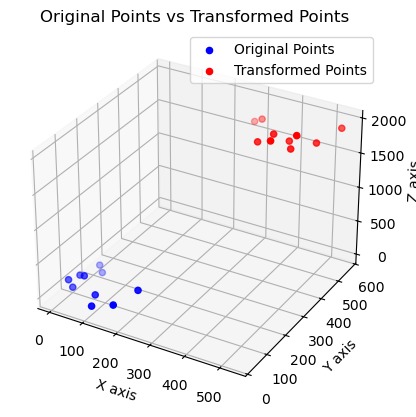

In [4]:
transformed_points = LA.transform_points(transformation_matrix, random_points)
Debug.plot_original_vs_transformed(random_points, transformed_points)

Find transformation from random_points to transformed_points

In [5]:
# Convert transformed_points and random_points to numpy arrays
transformed_points_np = Debug.vectors_to_numpy(transformed_points)
random_points_np = Debug.vectors_to_numpy(random_points)

# Call the function with correct inputs
R, t = LA.point_cloud_registration_least_squares(transformed_points_np, random_points_np)

print("Rotation matrix:", R)
print("Translation vector:", t, "\n")

print("Ground truth: \n", transformation_matrix)

Rotation matrix: [[ 6.12372349e-01 -6.12372470e-01  5.00000065e-01]
 [ 7.07106849e-01  7.07106714e-01  6.29009575e-09]
 [-3.53553406e-01  3.53553466e-01  8.66025366e-01]]
Translation vector: [ 397.57046822  351.5429424  1774.23594933] 

Ground truth: 
 [[   0.6124   -0.6124    0.5     397.5705]
 [   0.7071    0.7071    0.      351.5429]
 [  -0.3536    0.3536    0.866  1774.236 ]
 [   0.        0.        0.        1.    ]]


Proposed point:  Vector(368.99, 417.62, 1815.07)
Proposed point:  Vector(334.63, 505.77, 1898.50)
Proposed point:  Vector(464.78, 447.19, 1961.86)
Proposed point:  Vector(533.37, 566.23, 1891.02)
Proposed point:  Vector(311.16, 509.04, 1828.11)
Proposed point:  Vector(496.88, 496.30, 1789.88)
Proposed point:  Vector(449.65, 445.35, 1757.99)
Proposed point:  Vector(410.61, 408.77, 1902.42)
Proposed point:  Vector(401.94, 441.92, 1913.36)
Proposed point:  Vector(435.92, 463.69, 1810.28)
Truth point:  Vector(368.99, 417.62, 1815.07)
Truth point:  Vector(334.63, 505.77, 1898.50)
Truth point:  Vector(464.78, 447.19, 1961.86)
Truth point:  Vector(533.37, 566.23, 1891.02)
Truth point:  Vector(311.16, 509.04, 1828.11)
Truth point:  Vector(496.88, 496.30, 1789.88)
Truth point:  Vector(449.65, 445.35, 1757.99)
Truth point:  Vector(410.61, 408.77, 1902.42)
Truth point:  Vector(401.94, 441.92, 1913.36)
Truth point:  Vector(435.92, 463.69, 1810.28)


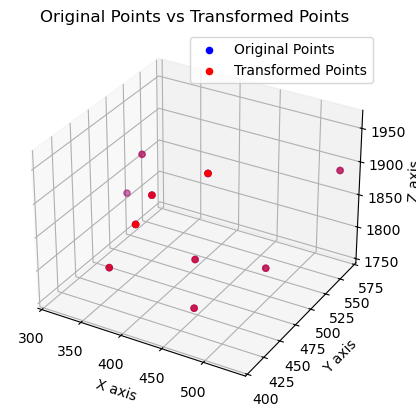

In [6]:
Proposed_transformation_matrix = LA.Frame(R, t)
Proposed_transformed_points = LA.transform_points(Proposed_transformation_matrix, random_points)

for point in Proposed_transformed_points:
    print("Proposed point: " ,point)

for point in transformed_points:
    print("Truth point: ", point)


Debug.plot_original_vs_transformed(transformed_points, Proposed_transformed_points)  

In [8]:
vectors = [
    [435.23, 494.25, -1278.90],
    [446.56, 432.42, -1379.92],
    [458.84, 405.61, -1215.28],
    [465.71, 388.82, -1371.15],
    [433.86, 450.57, -1377.35],
    [445.29, 470.54, -1238.88],
    [440.33, 481.04, -1249.67],
    [497.80, 394.06, -1318.32],
    [355.78, 477.43, -1344.66],
    [361.63, 365.44, -1380.96],
    [440.95, 484.29, -1336.65],
    [300.84, 400.14, -1289.10]
]

center, radius, residual_sum = LA.fit_sphere(vectors)
print("Center: ", center)

Center:  [  400.55156572   402.11393836 -1296.4620696 ]
